# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [2]:
import seaborn as sns
import scipy.stats as stat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.histplot(sample, kde=True, bins=10)
    
    # Population mean 
    population_mean = popmean
    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)
    # Sample Standard Deviation (sigma) using Numpy
    sample_stdev = np.std(sample, ddof=1)
    n = len(sample)
    
    # Degrees of freedom
    df = n - 1
    
    # Calculate the critical t-value
    t_critical = stat.t.ppf(1- alpha/2, df)
    # Calculate the t-value and p-value      
    t_statistic, p_value = stat.ttest_1samp(sample, population_mean)
    # return results
    return t_critical, t_statistic, p_value
    

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

t_critical: 2.093024054408263
t_statistic: 12.687592157174493
 p_value: 1.0053355594452825e-10
Reject the null hypothesis: The sample mean is significantly different from the population mean.


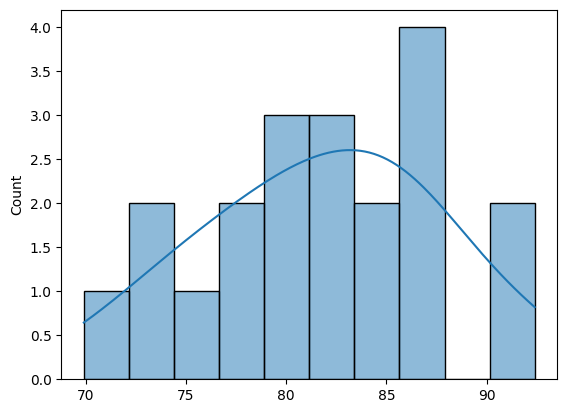

In [21]:
#set the null hypothesis
#Ho : mu = 65
#set the alternative hypothesis
#Ha : mu != 65
#random sample 
sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
#population_mean 
population_mean = 65
alpha = 0.05
t_critical, t_statistic, p_value = one_sample_ttest(sample, population_mean, alpha)

print("t_critical:", t_critical)
print("t_statistic:", t_statistic)
print(" p_value:", p_value)

# Check for significant difference
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")




Corrected sample results:
t_critical: 2.093024054408263
t_statistic: 13.202088288314906
p_value: 5.083361606682269e-11
Reject the null hypothesis: The corrected sample mean is significantly different from the population mean.

Effect size (Cohen's d): 2.837031853423536
The effect size is large.


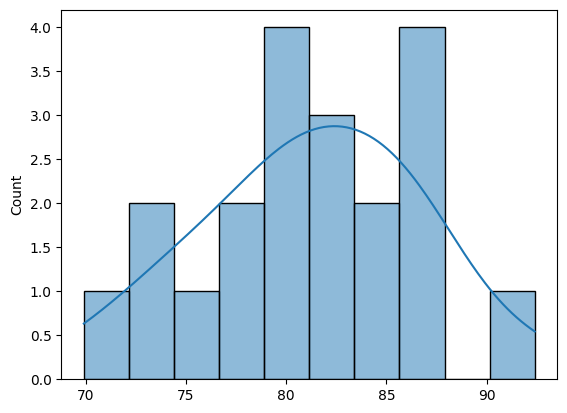

In [24]:
# Correct the erroneous score
corrected_sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                    78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

t_critical_corrected, t_statistic_corrected, p_value_corrected = one_sample_ttest(corrected_sample, population_mean, alpha)

print("\nCorrected sample results:")
print("t_critical:", t_critical_corrected)
print("t_statistic:", t_statistic_corrected)
print("p_value:", p_value_corrected)

# Check for significant difference in the corrected sample
if p_value_corrected < alpha:
    print("Reject the null hypothesis: The corrected sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The corrected sample mean is not significantly different from the population mean.")

# Calculate the effect size (Cohen's d) for the original sample
effect_size = (np.mean(sample) - population_mean) / np.std(sample, ddof=1)
print("\nEffect size (Cohen's d):", effect_size)

# Interpretation of effect size
if abs(effect_size) < 0.2:
    print("The effect size is small.")
elif abs(effect_size) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 